### This is an Analysis of variation  in
#### populations of underweight, normal/healthy weight, overweight and obese people* 
#### in the framingham data set 

##### Null Hypothesis in an Annova test of variance between groups is the two groups are similar.
##### Alternate Hypothesis is that one or more groups are different.

##### The P value tests the null hypothesis that data from all groups are drawn from populations with identical means. Therefore,  the P value answers this question:

###### If all the populations really have the same mean , what is the chance that random sampling would result in means as far apart (or more so) as observed in this experiment?

###### If the overall P value is large, the data do not give you any reason to conclude that the means differ. Even if the population means were equal, you would not be surprised to find sample means this far apart just by chance. This is not the same as saying that the true means are the same. You just don't have compelling evidence that they differ.

###### If the overall P value is small, then it is unlikely that the differences you observed are due to random sampling. You can reject the idea that all the populations have identical means. This doesn't mean that every mean differs from every other mean, only that at least one differs from the rest. Look at the results of post tests to identify where the differences are. 

#### Here we will prove that the populations are different and alternate hypothesis is true.

In [47]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 200)
expl_df  = pd.read_csv('D:\\IIMK\\QT\\Extra Reads\\CHI and ANNOVA\\4123_6408_bundle_archive\\framingham.csv')
expl_df.shape
expl_df.dropna(subset = ["male"], inplace=True)
expl_df.dropna(subset = ["age"], inplace=True)
expl_df.dropna(subset = ["education"], inplace=True)
expl_df.dropna(subset = ["currentSmoker"], inplace=True)
expl_df.dropna(subset = ["cigsPerDay"], inplace=True)
expl_df.dropna(subset = ["BPMeds"], inplace=True)
expl_df.dropna(subset = ["prevalentStroke"], inplace=True)
expl_df.dropna(subset = ["prevalentHyp"], inplace=True)
expl_df.dropna(subset = ["diabetes"], inplace=True)
expl_df.dropna(subset = ["totChol"], inplace=True)
expl_df.dropna(subset = ["sysBP"], inplace=True)
expl_df.dropna(subset = ["diaBP"], inplace=True)
expl_df.dropna(subset = ["BMI"], inplace=True)
expl_df.dropna(subset = ["heartRate"], inplace=True)
expl_df.dropna(subset = ["male"], inplace=True)
N = len(expl_df.index)

In [48]:
expl_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [49]:
#underweight people BMI<= 18.5
expl_df_underweight = expl_df[expl_df.BMI <= 18.5]
expl_df_underweight

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
56,0,54,1.0,1,9.0,0.0,0,0,1,266.0,114.0,76.0,17.61,88.0,55.0,0
90,1,53,1.0,1,20.0,0.0,0,0,0,188.0,138.0,89.0,18.23,60.0,75.0,0
117,0,37,2.0,1,5.0,0.0,0,0,0,185.0,100.0,68.0,18.38,70.0,72.0,0
186,0,45,4.0,1,15.0,0.0,0,0,0,224.0,117.0,74.5,16.75,68.0,87.0,0
243,0,40,2.0,1,20.0,0.0,0,0,0,197.0,124.0,76.0,18.06,90.0,69.0,0
320,1,44,1.0,1,20.0,0.0,0,0,0,197.0,118.0,81.0,17.44,70.0,75.0,0
342,0,41,4.0,1,15.0,0.0,0,0,0,207.0,111.0,60.0,18.48,60.0,76.0,0
377,1,67,1.0,0,0.0,0.0,0,0,0,203.0,122.0,74.0,15.54,96.0,79.0,0
538,1,64,2.0,0,0.0,0.0,0,0,0,193.0,114.0,79.0,16.59,75.0,64.0,0
555,0,40,2.0,0,0.0,0.0,0,0,0,242.0,110.0,75.0,16.69,58.0,68.0,0


In [50]:
#normal people BMI<=24.9 && compPrices$BMI>18.5
expl_df_normal_crit1 = expl_df[expl_df.BMI > 18.5]
expl_df_normal = expl_df_normal_crit1[expl_df_normal_crit1.BMI <= 24.9]
expl_df_normal

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0
10,0,50,1.0,0,0.0,0.0,0,0,0,254.0,133.0,76.0,22.91,75.0,76.0,0
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
15,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
16,1,48,3.0,1,10.0,0.0,0,1,0,232.0,138.0,90.0,22.37,64.0,72.0,0
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
18,0,38,2.0,1,5.0,0.0,0,0,0,195.0,122.0,84.5,23.24,75.0,78.0,0
20,0,42,2.0,1,30.0,0.0,0,0,0,190.0,108.0,70.5,21.59,72.0,85.0,0


In [51]:
#25.0 – 29.9	Overweight
expl_df_overweight_crit1 = expl_df[expl_df.BMI > 25.0]
#expl_df_overweight = expl_df_overweight_crit1[expl_df_normal_crit1.BMI <= 29.9]
#expl_df_overweight
expl_df_overweight = expl_df_overweight_crit1[expl_df_overweight_crit1.BMI <= 29.9]
expl_df_overweight

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
11,0,43,2.0,0,0.0,0.0,0,0,0,247.0,131.0,88.0,27.64,72.0,61.0,0
12,1,46,1.0,1,15.0,0.0,0,1,0,294.0,142.0,94.0,26.31,98.0,64.0,0
19,1,41,2.0,0,0.0,0.0,0,0,0,195.0,139.0,88.0,26.88,85.0,65.0,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
23,0,52,3.0,1,20.0,0.0,0,0,0,215.0,132.0,82.0,25.11,71.0,75.0,0


In [52]:
#30.0 and Above	Obese
expl_df_obese = expl_df[expl_df.BMI >= 30.0]
expl_df_obese

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
13,0,41,3.0,0,0.0,1.0,0,1,0,332.0,124.0,88.0,31.31,65.0,84.0,0
22,0,52,1.0,0,0.0,0.0,0,0,0,234.0,148.0,78.0,34.17,70.0,113.0,0
28,0,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
29,0,60,1.0,0,0.0,0.0,0,0,0,247.0,130.0,88.0,30.36,72.0,74.0,0
35,1,37,2.0,0,0.0,0.0,0,1,0,225.0,124.5,92.5,38.53,95.0,83.0,0
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
46,0,65,1.0,0,0.0,0.0,0,1,0,252.0,179.5,114.0,30.47,90.0,87.0,0
73,0,41,1.0,1,20.0,0.0,0,1,0,189.0,150.0,106.0,33.80,85.0,75.0,0


In [53]:
#We have these populations of people :- 1. Underweight  expl_df_underweight  2. Normal  expl_df_normal  3. Overweight people like me and  Mammootty expl_df_overweight 4. obese people like Mohan Lal : expl_df_obese
#We will compare 
#Annova Null Hypothesis : the groups are the same
#Annova Alternate Hypothesis : at least 1 group is different from the others
#Standard Annova assumptions : groups are normally distributed
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(expl_df_underweight, expl_df_normal, expl_df_overweight, expl_df_obese)
fvalue
#fvalues
#array([4.32445789e+01, 2.39108319e+01, 2.38051273e+01, 3.26889506e+01,
#       8.15775902e+00, 1.09901865e+01, 1.14848101e+00, 1.02651160e+02,
#       7.09145129e+00, 2.15378029e+01, 1.12774387e+02, 1.60797898e+02,
#       4.65607459e+03, 8.58054383e+00, 5.78182927e+00, 7.63876507e+00])



array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

In [54]:
pvalue
#pvalues
#array([1.89350299e-27, 2.55722016e-15, 2.98107031e-15, 7.68234281e-21,
#       2.06678825e-05, 3.50560020e-07, 3.28061475e-01, 9.08672282e-64,
#       9.49953177e-05, 8.00514395e-14, 8.39676140e-70, 7.91904780e-98,
#       0.00000000e+00, 1.12691370e-05, 6.11264545e-04, 4.34590005e-05])

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

In [55]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from patsy import dmatrices
vars = ['BMI', 'BPMeds', 'prevalentStroke']#, 'Wealth', 'Region']
expl_df[vars]
#Relation between BMI and other variables - BPMeds + prevalentStroke + currentSmoker + glucose + age
y, X = dmatrices('BMI ~ BPMeds + prevalentStroke + currentSmoker + glucose + age', data=expl_df, return_type='dataframe')
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model


                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     36.80
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           6.54e-37
Time:                        08:08:01   Log-Likelihood:                -10231.
No. Observations:                3658   AIC:                         2.047e+04
Df Residuals:                    3652   BIC:                         2.051e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          23.2647      0.455     

In [56]:
model_bpmeds_to_bmi = ols('BPMeds ~ BMI', data=expl_df).fit()
anova_table_bpmeds_to_bmi = sm.stats.anova_lm(model_bpmeds_to_bmi, typ=2)
anova_table_bpmeds_to_bmi

,sum_sq,df,F,PR(>F)
BMI,1.205265,1.0,42.76666,6.947877e-11
Residual,112.363048,3987.0,NaN,NaN


In [57]:
model = ols('BMI ~ BPMeds + prevalentStroke + currentSmoker + glucose + age', data=expl_df).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
BPMeds,387.592522,1.0,24.596889,7.388401e-07
prevalentStroke,16.497110,1.0,1.046918,3.062857e-01
currentSmoker,1013.952774,1.0,64.346144,1.393220e-15
glucose,222.936806,1.0,14.147724,1.716511e-04
age,460.043460,1.0,29.194676,6.964331e-08
Residual,57547.434926,3652.0,NaN,NaN


In [58]:
model_all = ols('BMI ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + heartRate + glucose + TenYearCHD', data=expl_df).fit()
anova_all = sm.stats.anova_lm(model_all, typ=2)
anova_all

,sum_sq,df,F,PR(>F)
male,369.307863,1.0,27.586296,1.588446e-07
age,6.296637,1.0,0.470342,4.928737e-01
education,716.324030,1.0,53.507462,3.152340e-13
currentSmoker,512.624402,1.0,38.291652,6.767572e-10
cigsPerDay,12.571642,1.0,0.939068,3.325821e-01
BPMeds,13.399624,1.0,1.000916,3.171555e-01
prevalentStroke,1.161582,1.0,0.086767,7.683449e-01
prevalentHyp,231.862117,1.0,17.319471,3.232356e-05
diabetes,69.021002,1.0,5.155682,2.322859e-02
totChol,150.486646,1.0,11.240944,8.082933e-04


### So as per the last comparison above on relationships with BMI ###


F>1.04 :-
H0 rejected for male, education, currentSmoker, prevalentHyp, diabetes,  totChol, diaBP : 
BMI has statistically significant relationship with those variables. 


F<1.04 :-
H0 accepted for TenYearCHD, glucose, heartRate, sysBP, prevalentStroke, cigsPerDay, age :
No statistically significant difference between BMI and those variables.

In [33]:
#Note:
#N is sample size
#degree of freedom is 1
#N-1 is df2 (denominator)
#1-1 is df1 (numerator)
# F>1.04 :-
# H0 rejected for male, education, currentSmoker, prevalentHyp, diabetes,  totChol, diaBP : 
#BMI has relationship with those variables. 
#####
#TF<1.04 for TenYearCHD, glucose, heartRate, sysBP, prevalentStroke, cigsPerDay, age :
#BMI has no significant relationship with those variables.


In [59]:
model_bmi_1 = ols('BMI ~ prevalentHyp + diabetes +  totChol + diaBP', data=expl_df).fit()
anova_bmi_1 = sm.stats.anova_lm(model_bmi_1, typ=2)
anova_bmi_1

,sum_sq,df,F,PR(>F)
prevalentHyp,421.406282,1.0,30.127337,4.297728e-08
diabetes,214.579789,1.0,15.340819,9.125942e-05
totChol,165.614054,1.0,11.840142,5.856326e-04
diaBP,3907.682533,1.0,279.369511,1.148626e-60
Residual,55726.221338,3984.0,NaN,NaN


In [65]:
model_bmi_1_obese = ols('BMI ~ prevalentHyp + diabetes +  totChol + diaBP', data=expl_df_obese).fit()
anova_bmi_1_obese = sm.stats.anova_lm(model_bmi_1_obese, typ=2)
anova_bmi_1_obese

,sum_sq,df,F,PR(>F)
prevalentHyp,18.982970,1.0,1.792825,1.811969e-01
diabetes,48.965005,1.0,4.624443,3.200309e-02
totChol,12.129936,1.0,1.145598,2.849942e-01
diaBP,313.863448,1.0,29.642469,8.192970e-08
Residual,5241.210068,495.0,NaN,NaN


In [62]:
model_bmi_1_overweight = ols('BMI ~ prevalentHyp + diabetes +  totChol + diaBP', data=expl_df_overweight).fit()
anova_bmi_1_overweight = sm.stats.anova_lm(model_bmi_1_overweight, typ=2)
anova_bmi_1_overweight

,sum_sq,df,F,PR(>F)
prevalentHyp,0.062905,1.0,0.034119,0.853477
diabetes,7.150577,1.0,3.878415,0.049079
totChol,1.924691,1.0,1.043937,0.307058
diaBP,41.415671,1.0,22.463526,0.000002
Residual,3023.643782,1640.0,NaN,NaN


In [63]:
model_bmi_1_normal = ols('BMI ~ prevalentHyp + diabetes +  totChol + diaBP', data=expl_df_normal).fit()
anova_bmi_1_normal = sm.stats.anova_lm(model_bmi_1_normal, typ=2)
anova_bmi_1_normal

,sum_sq,df,F,PR(>F)
prevalentHyp,4.145932,1.0,1.669197,0.196538
diabetes,0.821908,1.0,0.330909,0.565199
totChol,37.241297,1.0,14.993748,0.000112
diaBP,44.880083,1.0,18.069205,0.000022
Residual,4309.372925,1735.0,NaN,NaN


In [64]:
model_bmi_1_underweight = ols('BMI ~ prevalentHyp + diabetes +  totChol + diaBP', data=expl_df_underweight).fit()
anova_bmi_1_underweight = sm.stats.anova_lm(model_bmi_1_underweight, typ=2)
anova_bmi_1_underweight

,sum_sq,df,F,PR(>F)
prevalentHyp,0.277915,1.0,0.598671,0.442729
diabetes,0.141550,1.0,0.304920,0.583275
totChol,1.244596,1.0,2.681048,0.107828
diaBP,0.366364,1.0,0.789204,0.378595
Residual,23.210992,50.0,NaN,NaN


In [67]:
len(expl_df_underweight.index)
#55

55

In [68]:
len(expl_df_normal.index)
#1740

1740

In [69]:
len(expl_df_overweight.index)
#1645

1645

In [70]:
len(expl_df_obese.index)
#500

500

### Thus we can conclude (compared to general population) that 
##### 1. Diastolic Blood Pressure and Diabetes : declines in comparison based on BMI in descending order from Obese --> Overweight --> Normal --> Underweight people. (Much higher in Obese, less higher in overweight, much less in normal weight, and low in underweight)
#####  2. The sample sizes in the dataset are : Underwight - 55, Normal weight - 1740, Overweight - 1645, Obese -500. 
##### 3. Underweight : Compared to critical factor of 3.86, all F values are less, so H0 can be accepted - there is no difference
##### 4. Normal Weight : Compared to critical factor, only F values of diaBP, totChol, and to a lesser extent prevalentHyp has relation with BMI
##### 5. Overweight  : Diastolic BP and Diabetes have significant relation with BMI 
##### 6. Obese : diaBP, diabetes, prevalentHyp, totChol have significant relation with BMI.

## Conclusion  : Watch your weight.
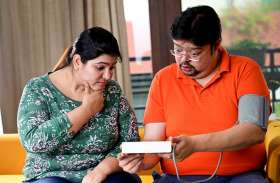
